### 1. 단층 퍼셉트론 
* 입력 단계와 출력 단계로만 구성
* 어떤 일이 가능하고 한계가 무엇인지 검토 : AND, NAND, OR 게이트는 구현 가능하나, XOR 문제는..

In [1]:
### AND 게이트 문제 : x1, x2 각 0 또는 1의 값을 갖는데 모두 1인 경우에만 y값이 1이 나오는 구조
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1 * w1 + x2 * w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [3]:
### NAND 게이트 문제 : x1, x2 각 0 또는 1의 값을 갖는데 둘 중 하나가 0이어야 y값이 1이 나오는 구조
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    
    if result <= 0:
        return 0
    else:
        return 1


In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [5]:
### OR 게이트 문제 : x1, x2 각 0 또는 1의 값을 갖는데 둘 중 하나만 1이어여도 y값이 1이 나오는 구조
def OR_gate(x1, x2):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [6]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

그러나 XOR 문제(서로 다른 값을 가질 때만 1을 출력하는 문제)는 단층 퍼셉트론으로는 구현할 수 없다. 왜냐하면, 단층 퍼셉트론은 직선 하나로 두 영역을 나눌 수 있는 문제만 다루기 때문이다.

---
따라서 **다층 퍼셉트론(MltiLayer Perceptron, MLP)**이 고안되었다.

In [24]:
def XOR_gate(x1, x2):
    if x1 == x2 :
        return 0
    else:
        return 1

In [25]:
XOR_gate(0, 0), XOR_gate(0, 1), XOR_gate(1, 0), XOR_gate(1, 1)

(0, 1, 1, 0)

### 2. 인공신경망 개관

1. 피드포워드 신경망(Feed-Forward Neural Network, FFNN) 
* 입력층에서 출력층 방향으로 연산이 전개되는 신경망
* 은닉층(hidden layer)의 출력값을 출력층으로 보내기도 하고, 다시 은닉층으로 보내 입력으로 다시 사용함

2. 전결합층(Fully-connected layer, FC, Dense layer)
* 은닉층, 출력층 모두 연결된 경우
* 케라스에서 이를 구현할 때 Dense() 메소드를 활용

3. 활성화 함수(Activation Function)
* 은닉층 또는 출력층(단층일 경우)의 뉴런에서 출력값을 결정하는 함수


In [26]:
### 활성화 함수 시각화
def step(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step(x)

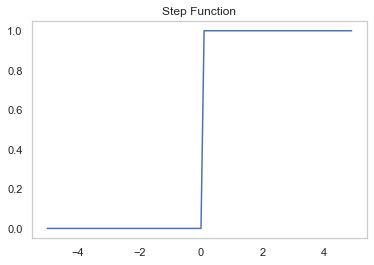

In [27]:
%matplotlib inline
plt.plot(x, y)
plt.title('Step Function')
plt.grid(False)
plt.show()

### 3. 시그모이드 함수(Sigmoid function)와 기울기 소실문제
* 순전파(forwad propagation) 연산을 하고 난후, 예측값과 실제값의 오차를 손실함수를 통해 계산하는데 이를 손실 또는 오차라고 부름
* 이 과정에서 미분을 통해 기술기를 구하고 가중치와 편향을 업데이트하기 위해 역전파(back propagation)를 수행함
* 미분을 해서 기울기를 구할 때 문제가 발생

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

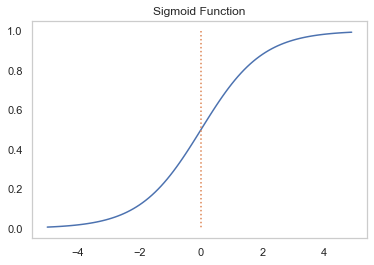

In [29]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0], ':')
plt.title('Sigmoid Function')
plt.grid(False)
plt.show()

* 시그모이드 함수의 값이 0, 1에 가까워질 수록 완만해 지는 것을 볼 수 있는데, 이렇게 되면 미분 값이 0에 가까운 작은 값이 되어버림
* 즉, 시그모이드 함수를 활성화함수로 이용한다면 가중치와 편향을 업데이트하는 과정인 역전파 과정에서 0에 가까운 값이 누적해서 곱해져 기울기가 잘 전달되지 않음
* 이 현상을 **기울기 소실(Vanishing Gradient)** 문제라고 함

---
* 따라서 시그모이드 함수는 주로 이진분류를 위해 출력층에서 사용되고 은닉층에서의 사용은 지양됨

### 4. 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

* 이 함수는 입력값을 -1과 1 사이의 값으로 변환하여 출력

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

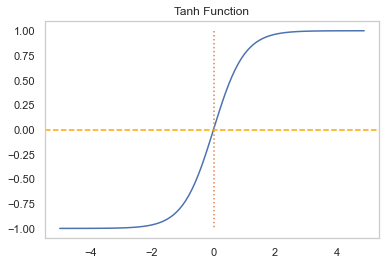

In [31]:
plt.plot(x, y)
plt.plot([0, 0], [1, -1], ':')
plt.grid(False)
plt.axhline(y=0, color='orange', linestyle='--')
plt.title("Tanh Function")
plt.show()

* 마찬가지로 끝에 가서는 시그모이드 함수와 같은 현상이 발생
* 그러나 시그모이드 함수와 달리 0을 중심으로 하고 있어 미분했을 경우 시그모이드 함수보다 큰 값이 나옴
* 따라서 시그모이드 함수보다 기울기 소실이 적어 보다 선호됨

### 5. ReLU 함수
* 가장 인기 있는 함수로 $f(x) = max(0, x)$로 간단

In [32]:
def relu(x):
    return np.maximum(0, x)

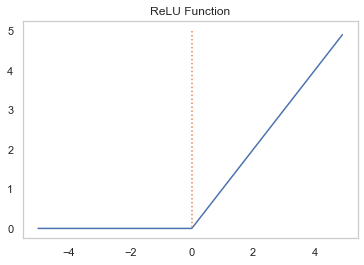

In [35]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5, 0], ':')
plt.grid(False)
plt.title("ReLU Function")
plt.show()


* 렐루함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환
* 특징이 특정 양수값에 수렴하지 않는다는 것이고, 0 이상의 입력값에서는 미분값이 항상 1임
* 위의 함수들과 달리 어떤 연산이 필요하지 않고, 단순 임계값만 설정하므로 계산이 빠름

----
* 하지만 여전히 문제점이 존재하는데 입력값이 음수이면 미분값이 0이 되기 때문에, 뉴런 회생이 어려움. 이를 죽은 렐루(dying ReLU)라고 함

### 6. 리키 렐루(Leaky ReLU)
* 위의 렐루함수를 보완하기 위해 등장
* 입력값이 음수일 경우 0이 아니라 0.001과 같은 아주 작은 수를 반환하도록 되어 있음
* 수식 : $f(x) = max(ax, x)$로 아주 간단하고, $a$는 하이퍼파라미터로 Leaky(새는 정도)를 결정
    * 일반적으로 0.01값을 가짐. 입력값이 음수일 경우 기울기 비유

In [36]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

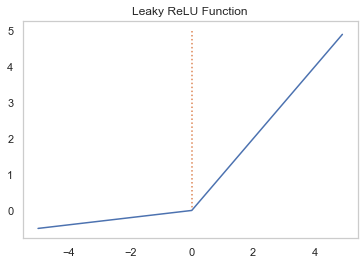

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0, 0], [5, 0], ':')
plt.grid(False)
plt.title("Leaky ReLU Function")
plt.show()

* 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않음

### 7. 소프트맥스 함수(Softmax function)
* 은닉층에서는 ReLU 또는 ReLU 변형함수를 사용하는 것이 일반적임
* 그러나 출력층에서는 소프트맥스 함수가 주로 사용됨
* 시그모니드 함수가 이진분류에 사용되고, 소프트맥스 함수는 다중클래스 분류에 사용
* 즉 이진분류시에는 출력층에 앞서 배운 로지스틱 회귀를 사용하고, 다중 클래스분류에서는 소프트맥스 회귀를 사용

In [38]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

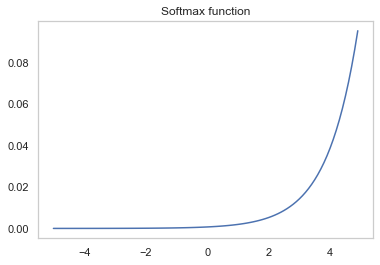

In [39]:
plt.plot(x, y)
plt.title('Softmax function')
plt.grid(False)
plt.show()